# PCA

### Problem Statement  
__the wine owner gathered all the information of the independent variables that are chemical's information of several wines and he applied some clustering technique to find some segments of customers, each segment having a specific preference for a specific wine , so he found three types of wines each type of wine corresponding to one segment of customers and therefore three segments of customers  
and why does it creates added value for its business? well that's because now business owner can do is take all these informations of the wines as well as the info of about the customer segments and make a classification model like logistic regression in which independent varaible are all these variable and dependent variable is the customer segment it should recommend this wine  
So the logistic regression model that we're going to build is going to return the customer segment that each new wine should be recommended to,so that adds a lot of value to this business owner__  
  
  __but then if this business owner wants to have a clear visual look at the prediction regions and the prediction boundary of the classification model that hat we're going to build to be able to see if the predictions are in the right spot of the customer segments.  
Well it cannot be done with all these independent variables because of course we cannot represent these many independent variables in one plot.__

***
__So what we need to do is apply some dimensionality reduction techniques to extract two independent variable that explain the most the variance and then we'll be able to see the prediction regions and the prediction boundary and therefore will clearly be able to see where the customer segments are and where are these predictions that the customer segments are.  
According to the extracted features of all the informations of our independent variables. And remember these extracted features are called the principal components.  
So let's do this let's build our logistic regression classification model and let's apply PCA to reduce the dimensionality of our problem and eventually to visualize the results.__

In [78]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# importing the dataset
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [80]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [81]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [82]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [66]:
explained_variance

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

 `n_components` is the number of extracted features that we want to get that will explain the most of the variance and depending on what variance you woul like to be explained you will choose the right no of principal components  
 but the problem was that we know we want to get two principal components eventuallu to be able to visualise this training set and the test results but we don't know how much variance these two components explain, so we need to chech that and we input 'none' because then we created a vector that we called 'explained_variance' and we are going to see the cumulative vaiance explained by all the pricipal components  
 So as you can see since we originally had 13 independent variables Well it extracted thirteen principal components.  
 So these 13 components are independent variables but these are not the original independent variables that we had in our data set.  
 These are the new extracted independent variables but that explained the most the variance.  
 And as you can see they are ranked from the first principal component that explains the most the variance down to the 12th and last principal component that explains the least the variance.  
 So that means that if we include one principal component that will explain 37 percent of the variance then if we take two principal components that will explain 37 plus 19 equals 56 percent of the variance.  
 And then if we take the top three principal components that will explain 37 plus 10:19 Well 11 equals 67 percent of the variance and et cetera.  
 So remember what we want to take are the first two principal components because we want to get two dimensions in the visualization of the training such result and therefore we need two independent variables that is the two principal components.  
 And so we can see that if we take the two principal components here well they will explain 56 percent of the variance and that is pretty good.  
 That is actually OK to make a classification more out of it.


replacing 'none' by 2 and doing it again

In [67]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [69]:
X_train #has only two independent variables

array([[-6.22149394e+01,  7.94217231e+00],
       [-2.47627050e+02, -1.61320345e+01],
       [-3.97303052e+02,  4.20470704e+00],
       [ 7.68348344e+00,  1.89117232e+00],
       [ 1.02587082e+02, -5.70689181e+00],
       [ 5.42597420e+02, -7.63625072e+00],
       [-4.52456427e+02, -4.92269745e+00],
       [-1.80499857e+02, -9.23954096e+00],
       [-3.08491393e+02, -7.16757824e+00],
       [ 1.02932964e+02,  1.42428196e+01],
       [-4.74154057e+01, -5.30460413e+00],
       [ 1.43652577e+02, -1.35060484e+00],
       [ 1.12849551e+02,  1.01620885e+01],
       [ 5.37914203e+02,  1.14084871e+01],
       [-2.12242850e+02,  7.32050285e+00],
       [-1.62501960e+02, -9.47176871e+00],
       [ 5.29559561e+01,  1.60582881e+01],
       [-8.23567843e+01, -5.97796117e-01],
       [ 2.92657304e+02, -3.77066735e+00],
       [-4.30399265e+02, -1.25843835e+00],
       [ 9.29786729e+01,  1.85217392e+01],
       [ 8.76727051e+01,  5.60330712e-01],
       [-3.32532135e+02, -8.72453002e+00],
       [-1.

In [84]:
# Fitting Logistic regressin to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'auto')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [85]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [86]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [87]:
%matplotlib notebook

<IPython.core.display.Javascript object>


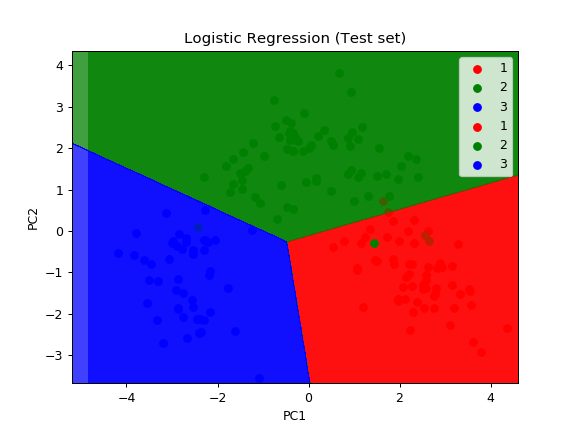

(-4.844169946131748, 5.345830053868035)

(-4.539066249934901, 4.8009337500649)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Logistic Regression (Training set)')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

In [88]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

<IPython.core.display.Javascript object>


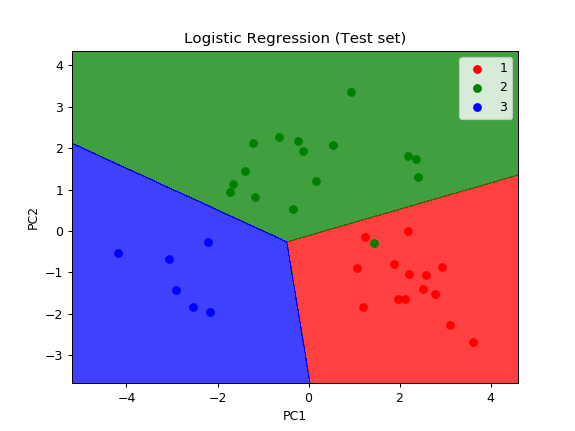

(-5.197595801045068, 4.612404198954723)

(-3.6808796657835705, 4.349120334216258)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Logistic Regression (Test set)')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

In [90]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()